In [1]:
import os
import sys
import datetime
import re
import numpy as np

In [2]:
rundir = os.path.abspath(os.path.join('..','..','result_data',
                                                   re.sub(r"[-:\.\s]","_",str(datetime.datetime.now())))) + "\\"

In [3]:
rundir

'C:\\Users\\D072202\\RData2Graph\\rdata2graph\\result_data\\2019_05_26_13_19_01_138070\\'

In [4]:
os.path.join(rundir, 'asd.log')

'C:\\Users\\D072202\\RData2Graph\\rdata2graph\\result_data\\2019_05_26_13_19_01_138070\\asd.log'

In [6]:
import pandas as pd
import numpy as np
x = pd.DataFrame([[1,5]])
x

,0,1
0,1,5


In [43]:
x=x.append([[9,9]],ignore_index=True)
x.loc[0,'hoho'] = 'abc'
x.loc[1,'hoho'] = 'abc'
x

,0,1,hoho
0,1,5,abc
1,9,9,abc


In [106]:
documents = list()
with open('C:/Users/D072202/DeepAnyMatch/DeepAnyMatch-master/data/sap_hilti_data/sap_hilti_full_strings/graph_triples_hilti_erp.nt',encoding='UTF-8', mode='r') as i:
    with open('C:/Users/D072202/DeepAnyMatch/DeepAnyMatch-master/data/sap_hilti_data/sap_hilti_full_strings/graph_triples_hilti_erp2.nt',encoding='UTF-8',mode="w+") as o:
        for line in i:
            if 'maktx' in line.lower():
                o.write(line)
        o.close()
    i.close()

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


In [55]:
documents= [['id1','cordless','hammer'],
            ['id4','something','else'],
            ['id2','cordless','hammer','3D'],
            ['id3','cordless','smartphone'],['id1','cordless','hammer'],
            ['id4','something','else'],
            ['id2','cordless','hammer','3D'],
            ['id3','cordless','smartphone'],['id1','cordless','hammer'],
            ['id4','something','else'],
            ['id2','cordless','hammer','3D'],
            ['id3','cordless','smartphone'],['id1','cordless','hammer'],
            ['id4','something','else'],
            ['id2','cordless','hammer','3D'],
            ['id3','cordless','smartphone'],['id1','cordless','hammer'],
            ['id4','something','else'],
            ['id2','cordless','hammer','3D'],
            ['id3','cordless','smartphone'],['id1','cordless','hammer'],
            ['id4','something','else'],
            ['id2','cordless','hammer','3D'],
            ['id3','cordless','smartphone'],['id1','cordless','hammer'],
            ['id4','something','else'],
            ['id2','cordless','hammer','3D'],
            ['id3','cordless','smartphone'],['id1','cordless','hammer'],
            ['id4','something','else'],
            ['id2','cordless','hammer','3D'],
            ['id3','cordless','smartphone'],['id1','cordless','hammer'],
            ['id4','something','else'],
            ['id2','cordless','hammer','3D'],
            ['id3','cordless','smartphone'],['id1','cordless','hammer'],
            ['id4','something','else'],
            ['id2','cordless','hammer','3D'],
            ['id3','cordless','smartphone']]
#model = Word2Vec(documents)#, negative=20, sample=1e-3)
print("done")

done


In [2]:
#df=pd.read_csv('C:/Users/D072202/DeepAnyMatch/DeepAnyMatch-master/result_data/test_2019_03_26_10_45_38_360067/w2v_formatted_training_material.csv', sep=',',header=None)
#documents = df.values.tolist()


In [3]:
documents = list()
with open('C:/Users/D072202/RData2Graph/rdata2graph/data/sap_hilti_data/corpus_hilti_web.txt',encoding='UTF-8') as f:
    for line in f:
        documents.append(line.split(" "))
    f.close()
with open('C:/Users/D072202/RData2Graph/rdata2graph/data/sap_hilti_data/corpus_hilti_erp.txt',encoding='UTF-8') as f:
    for line in f:
        documents.append(line.split(" "))
    f.close()
documents[:5]

[['<http://rdata2graph.sap.com/hilti_web/torx_screw_m6x16__repair_part_#666d6335-10ac-4ac9-8f2a-9292d66f4a8d>',
  '<http://rdata2graph.sap.com/hilti_web/property/categories.id>',
  '<http://rdata2graph.sap.com/hilti_web/demolition_hammers___breakers#8bdace2e-dd5d-4f71-8482-7a967edd17c1>',
  '<http://rdata2graph.sap.com/hilti_web/property/categories.id>',
  '<http://rdata2graph.sap.com/hilti_web/power_tools#1837e7e8-1244-49af-81aa-fd76267dc611>',
  '<http://rdata2graph.sap.com/hilti_web/property/categories.id>',
  '<http://rdata2graph.sap.com/hilti_web/products#8e9b1360-521e-4056-b3b6-2d0e781f176e>',
  '<http://rdata2graph.sap.com/hilti_web/property/categories.description>',
  '"see',
  'how',
  'to',
  'increase',
  'your',
  'productivity',
  'and',
  'mobility',
  'by',
  'using',
  'cordless',
  'tools:',
  'hammer',
  'drill',
  'drivers',
  'impacts',
  'angle',
  'grinders',
  'rotary',
  'hammers',
  'and',
  'saws"\n'],
 ['<http://rdata2graph.sap.com/hilti_web/torx_screw_m6x16_

In [4]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import re
import numpy as np
import pandas as pd
import os

def stem(sents):
    new_sents = list()
    for sent in sents:
        tmp = list()
        for word in sent:
            if not 'http://' in word:
                word = ps.stem(re.sub('[^A-z0-9<>]','', word))
            else:
                word = re.sub('[\r\n]','',word)
            if not word == '' and len(word) > 1:
                tmp.append(word)
        if len(tmp) > 1:
            new_sents.append(tmp)
    return new_sents


def tuplize(sents):
    f = open('_tmp.tmp','w+', encoding="UTF-8")
    new_sents = list()
    for sentence in sents:
        for j in range(len(sentence)):
            for k in range(j+1,len(sentence)):
                f.write(sentence[k] + ',' + sentence[j] + "\n")
    f.close()
    documents=list()
    df=pd.read_csv('_tmp.tmp', sep=',',header=None, error_bad_lines=False)
    documents = df.values.tolist()
    os.remove('_tmp.tmp')
    return documents
    
documents = stem(documents)
documents = tuplize(documents)
documents = documents + [['<>','<>']]

for i in range(10):
    print(str(documents[i]))

['<http://rdata2graph.sap.com/hilti_web/property/categories.id>', '<http://rdata2graph.sap.com/hilti_web/torx_screw_m6x16__repair_part_#666d6335-10ac-4ac9-8f2a-9292d66f4a8d>']
['<http://rdata2graph.sap.com/hilti_web/demolition_hammers___breakers#8bdace2e-dd5d-4f71-8482-7a967edd17c1>', '<http://rdata2graph.sap.com/hilti_web/torx_screw_m6x16__repair_part_#666d6335-10ac-4ac9-8f2a-9292d66f4a8d>']
['<http://rdata2graph.sap.com/hilti_web/property/categories.id>', '<http://rdata2graph.sap.com/hilti_web/torx_screw_m6x16__repair_part_#666d6335-10ac-4ac9-8f2a-9292d66f4a8d>']
['<http://rdata2graph.sap.com/hilti_web/power_tools#1837e7e8-1244-49af-81aa-fd76267dc611>', '<http://rdata2graph.sap.com/hilti_web/torx_screw_m6x16__repair_part_#666d6335-10ac-4ac9-8f2a-9292d66f4a8d>']
['<http://rdata2graph.sap.com/hilti_web/property/categories.id>', '<http://rdata2graph.sap.com/hilti_web/torx_screw_m6x16__repair_part_#666d6335-10ac-4ac9-8f2a-9292d66f4a8d>']
['<http://rdata2graph.sap.com/hilti_web/products#8

In [19]:
d2 = list()
for d in documents:
    if not 'http' in d[0] or not 'http' in d[1]:
        d2.append(d)

documents = d2
np.array(documents)[:100,:]

IndexError: too many indices for array

In [56]:

import gensim.models.word2vec as w2v
import multiprocessing
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 2
# Minimum word count threshold.
min_word_count = 1

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 1

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 0.05

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1
sentences = documents
model = w2v.Word2Vec(
    sg=0,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size
)
model.build_vocab(sentences)


In [57]:
k=50000
model.train(sentences, total_examples=model.corpus_count, epochs=k)

(698981, 6500000)

In [58]:
def setify(li):
    s = set()
    for l1 in li:
        for elem in l1:
            s.add(elem)
    return s

In [59]:

ids = setify(documents)# if 'torx_soc' in x or 'hammer' in x]
import random
#ids = random.sample(ids,15)
emb = list()
tmp_ids = list()
for i in ids:
    try:
        emb.append(model.wv[i])
        tmp_ids.append(i)
    except:
        pass
emb = np.array(emb)
ids = tmp_ids
ids

['id2',
 'cordless',
 'id3',
 'something',
 'smartphone',
 'id4',
 'hammer',
 'else',
 '3D',
 'id1']

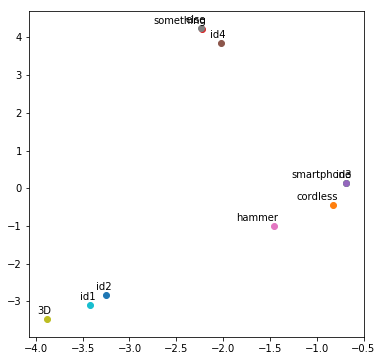

Done


In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
for i, label in enumerate(ids):
        x, y = emb[i,0], emb[i,1]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5,3),
            textcoords='offset points', ha='right', va='bottom')
plt.savefig("C:/Users/D072202/Desktop/w2v_"+str(model.alpha)+"alpha_"+str(len(documents))+"ids_"+str(k)+"epochs.png")
plt.show()
print("Done")

In [114]:
model.wv['<>']

array([-0.67011774, -1.1712103 ], dtype=float32)

In [115]:
model.wv['<>']

array([-0.67011774, -1.1712103 ], dtype=float32)